# Perkenalan

Milestone 2

* Nama          : Raina Imtiyaz
* Batch         : CODA-RMT-0012
* Link Tableau  : https://public.tableau.com/app/profile/raina.imtiyaz4352/viz/P1M2_raina_imtiyaz/Story1?publish=yes

Program ini dibuat untuk melakukan analisis statistik pada Data Informasi Bencana Indonesia yang bertujuan memberi dasar strategis untuk menyusun kebijakan mitigasi yang lebih tepat. Fokusnya adalah menekan korban jiwa dan mengurangi kerusakan infrastruktur di wilayah provinsi yang paling rentan.

# Identifikasi Masalah

**Topik Permasalahan**
Optimalisasi strategi mitigasi bencana di wilayah rawan untuk menekan angka korban jiwa dan kerusakah infrastruktur.

**SMART Framework**  
* **S**pecific: Meningkatkan upaya mitigasi di provinsi rawan bencana untuk meminimalisit dampak sosial dan kerugian fisik.  
* **M**easurable: Mengurangi jumlah korban jiwa dan rumah rusak berat sebesar 15% dari rata-rata 5 tahun terakhir.  
* **A**chievable: Memperbaiki sistem peringatan dini, menerapkan aturan zonasi yang lebih ketat, dan sering melakukan simulasi tanggap darurat di wilayah yang dianggap rawan.  
* **R**elevant: Menurunnya jumlah korban jiwa dan kerusakan bangunan jadi indikator utama keberhasilan penanganan bencana, karena langsung berpengaruh pada kenyamanan hidup masyarakat dan kondisi ekonomi daerah.  
* **T**ime-Bound: Target penurunan dampak diharapkan tercapai dalam 1 tahun ke depan setelah rekomendasi dijalankan.  
  

**Problem Statement**  
Tujuan dari analisis ini adalah membuat mitigasi bencana di provinsi rawan supaya jadi lebih efektif dengan target menurunkan jumlah korban jiwa dan kerusakan rumah berat hingga 15% dalam satu tahun ke depan. Untuk mencapai tujuan tersebut diperlukan adanya perbaikan sistem peringatan dini, aturan zonasi yang lebih ketat, dan peningkatan latihan tanggap darurat agar keselamatan warga lebih terjamin. 
  

**Latar Belakang**  
Indonesia berada di kawasan *Ring of Fire*, sehingga sangat rentan terhadap bencana seperti gempa, letusan gunung berapi, banjir, dan longsor. Data Informasi Bencana Indonesia (DIBI) dari Badan Nasional Penanggulangan Bencana (BNPB) menunjukkan ribuan bencana terjadi setiap tahun, menimbulkan korban jiwa, pengungsian, dan kerusakan besar.  
Walau datanya sudah lengkap, pemanfaatan untuk mengambil keputusan belum maksimal. Penanganan bencana masih cenderung dilakukan setelah kejadian. Padahal, analisis data historis bisa membantu menemukan pola, wilayah paling rawan, dan jenis bencana yang berdampak paling berat. Dengan begitu, anggaran dan sumber daya bisa dipakai lebih tepat sasaran untuk pencegahan.

**Tentang Dataset**  
Dataset bersumber dari DIBI BNPB, mencakup 50.000 rekam jejak historis kejadian bencana di seluruh provinsi, lengkap dengan detail waktu, lokasi, serta dampak kerusakannya terhadap korban jiwa maupun infrastruktur.

**Penjabaran Masalah**  
1.  Bagaimana tren jumlah kejadian bencana di Indonesia dari tahun ke tahun?  
*(metrik: Tahun, Jumlah Kejadian)*
2. Jenis bencana apa yang paling sering terjadi dan paling dominan di Indonesia?  
*(metrik: Jenis Bencana, Jumlah Kejadian)*
3. Provinsi mana yang termasuk zona merah dengan total kerusakan rumah berat tertinggi?  
*(metrik: Provinsi, Rumah Rusak Berat)*
4. Bagaimana hubungan antara jenis bencana dan jumlah korban meninggal? Apakah bencana yang sering terjadi memang menyebabkan kematian tertinggi? Atau justru bencana yang jarang terjadi yang lebih mematikan?  
*(metrik: Jenis Bencana, Meninggal, Jumlah Kejadian)*
5. Bagaimana karakteristik distribusi jumlah pengungsi per kejadian, baik dari sisi nilai pusat maupun penyebarannya, apakah distribusinya mendekati normal? Atau menunjukkan skewness dan outlier yang cukup ekstrem?  
*(metrik: Mengungsi)*
6. Apakah terdapat perbedaan signifikan secara statistik pada rata-rata jumlah rumah rusak berat antara bencana tsunami dan gempa bumi?  
*(metrik: Jenis Bencana, Rumah Rusak Berat)*

# Data Loading

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Setting display output

In [13]:
# Untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Untuk menampilkan semua baris
pd.set_option('display.max_rows', None)

# Supaya teks panjang dalam sel tidak terpotong
pd.set_option('display.max_colwidth', None)

## Data Exploration

In [166]:
# Import Data
df = pd.read_csv("DIBI_BNPB.csv")
df.head()

,id,Tanggal / Waktu Kejadian,Minggu,Bulan,Tahun,Kode Provinsi,Provinsi,Kode Kabupaten,Kabupaten,Kode Jenis Kejadian,Nama Kejadian,Jenis Bencana,is_bencana,Jumlah Kejadian,Meninggal,Hilang,Luka / Sakit,Menderita,Mengungsi,Rumah Rusak Berat,Rumah Rusak Sedang,Rumah Rusak Ringan,Rumah Terendam,Satuan Pendidikan Rusak,Rumah Ibadat Rusak,Fasilitas Pelayanan Kesehatan Rusak,Kantor Rusak,Jembatan Rusak
0,7a2eae15-b538-4e7a-a25e-cd1dd8bc7db0,2025-11-29 20:47:23.519,48,11,2025,13,Sumatera Barat,13.08,Pasaman,1010,Banjir,Banjir,True,1.0,0,0,0,0,1680,0,0,3,0,0,0,0,0,0
1,9123ea8a-d6e9-4a17-ab5b-0be5307dc134,2025-11-29 10:25:00.101,48,11,2025,72,Sulawesi Tengah,72.05,Buol,1032,Abrasi Pantai,Gelombang pasang / Abrasi,True,1.0,0,0,0,64,0,0,0,0,11,0,0,0,0,0
2,475d87c8-19f8-4d40-bdf1-15ee689fecd5,2025-11-28 15:25:00.433,48,11,2025,52,Nusa Tenggara Barat,52.06,Bima,1010,Banjir,Banjir,True,1.0,0,0,0,1470,0,0,0,0,294,0,0,0,0,0
3,05c0eb77-13ce-48c3-b8c5-2b50496bdb4f,2025-11-27 18:00:00.624,48,11,2025,12,Sumatera Utara,12.71,Kota Medan,1010,Banjir,Banjir,True,1.0,0,0,0,10917,4469,0,0,0,10917,0,0,0,0,0
4,26d8ec0b-e160-4d4e-9e59-b0e57222f88c,2025-11-27 16:48:34.566,48,11,2025,12,Sumatera Utara,12.09,Asahan,1010,Banjir,Banjir,True,1.0,0,0,0,0,453,0,0,0,0,0,0,0,0,0


In [167]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   50000 non-null  object 
 1   Tanggal / Waktu Kejadian             50000 non-null  object 
 2   Minggu                               50000 non-null  int64  
 3   Bulan                                50000 non-null  int64  
 4   Tahun                                50000 non-null  int64  
 5   Kode Provinsi                        50000 non-null  int64  
 6   Provinsi                             50000 non-null  object 
 7   Kode Kabupaten                       50000 non-null  float64
 8   Kabupaten                            50000 non-null  object 
 9   Kode Jenis Kejadian                  50000 non-null  int64  
 10  Nama Kejadian                        50000 non-null  object 
 11  Jenis Bencana               

* Data terdiri dari 50.000 baris dan 28 kolom.
* Tidak terdapat missing value (seluruh kolom memiliki 50000 non-null).
* Kolom `Tanggal / Waktu Kejadian` yang masih bertipe object, perlu diganti menjadi tipe datetime, namun karena berdasarkan penjabaran masalah kolom ini tidak dipakai, maka akan dibiarkan saja, karena akan dihapus.
* Data pada kolom `Jumlah Kejadian` perlu diubah menjadi integer karena jumlah kejadian tidak mungkin desimal dan selalu merupakan hitungan kejadian (count), sehingga harus berupa bilangan bulat.


In [168]:
# Statistik Deskriptif
df.describe()

,Minggu,Bulan,Tahun,Kode Provinsi,Kode Kabupaten,Kode Jenis Kejadian,Jumlah Kejadian,Meninggal,Hilang,Luka / Sakit,Menderita,Mengungsi,Rumah Rusak Berat,Rumah Rusak Sedang,Rumah Rusak Ringan,Rumah Terendam,Satuan Pendidikan Rusak,Rumah Ibadat Rusak,Fasilitas Pelayanan Kesehatan Rusak,Kantor Rusak,Jembatan Rusak
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,5.000000e+04,50000.00000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24.704480,6.053840,2019.194420,37.622120,37.788476,1029.974620,0.952525,0.270940,0.043440,1.72828,1.405621e+03,158.77876,6.23424,4.64764,16.390360,202.423020,0.270500,0.177360,0.041420,0.052700,0.061280
std,16.320242,3.731769,4.042339,19.381015,19.378025,18.790509,0.173343,16.951999,2.769402,91.70798,1.453444e+04,3131.82154,237.75304,139.34257,335.441056,1792.270703,8.677527,4.565965,1.329519,1.536766,0.924696
min,1.000000,1.000000,2010.000000,11.000000,11.010000,1010.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,3.000000,2017.000000,32.000000,32.010000,1010.000000,1.000000,0.000000,0.000000,0.00000,0.000000e+00,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,6.000000,2020.000000,33.000000,33.120000,1020.000000,1.000000,0.000000,0.000000,0.00000,0.000000e+00,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.000000,10.000000,2023.000000,52.000000,52.010000,1041.000000,1.000000,0.000000,0.000000,0.00000,4.900000e+01,0.00000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,53.000000,12.000000,2025.000000,96.000000,96.710000,1094.000000,3.000000,3624.000000,570.000000,11124.00000,1.510284e+06,366274.00000,40795.00000,16059.00000,45604.000000,212916.000000,1109.000000,547.000000,139.000000,196.000000,103.000000


* Dataset memuat data bencana selama 15 tahun dari tahun 2010-2025.
* Jumlah kejadian per baris kecil (0-3).
* Sebagian besar kolom dampak seperti `Meninggal`, `Hilang`, `Luka/Sakit`, `Rumah Rusak`, `Mengungsi`, `Rumah Terendam`, dan yang lainnya memiliki median 0, rata-rata kecil, namun nilai maksimum yang tinggi, yang berarti mayoritas kejadian tidak menimbulkan kerusakan atau korban besar, tapi ketika terjadi bencana besar, dampaknya sangat ekstrem.
* Jarang terjadi kerusakan fasilitas publik, namun ketika ada, bisa mencapai ratusan.
* Standar deviasi yang tinggi pada kolom `Mengungsi`, `Rumah Rusak berat`, `Rumah Rusak Sedang`, `Rumah Rusak Ringan`, dan `Rumah Terendam` menandakan distribusi yang sangat tidak merata, bisa dikatakan bahwa banyak kejadian dengan dampak yang sangat kecil dan sedikit kejadian skala besar yang mendominasi dampak nasional.


In [169]:
# Statistik Deskriptif Kategorikal
df.describe(include='object')

,id,Tanggal / Waktu Kejadian,Provinsi,Kabupaten,Nama Kejadian,Jenis Bencana
count,50000,50000,50000,50000,50000,50000
unique,50000,24270,38,511,27,9
top,7a2eae15-b538-4e7a-a25e-cd1dd8bc7db0,2011-09-01 08:08:08,Jawa Barat,Bogor,Banjir,Banjir
freq,1,90,9240,2555,15465,16631


* Kolom `id` semuanya bernilai unik, yang berarti tidak ada data duplikat, namun setelah kolom `id` dihapus, perlu dicek kembali apakah ada data duplikat, jika ada perlu dihapus.
* Banyak kejadian terjadi pada `Tanggal / Waktu Kejadian` yang sama, paling banyak di 1 September 2011 dimana terdapat 90 kejadian.
* Dataset mencakup seluruh provinsi di Indonesia dengan frekuensi kejadian tertinggi di Jawa Barat dengan 9240 kejadian.
* Banjir adalah jenis kejadian dan bencana yang paling sering dilaporkan.



# Data Cleaning

In [170]:
# Ubah kolom `Jumlah Kejadian` menjadi tipe Int64
df['Jumlah Kejadian'] = df['Jumlah Kejadian'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   50000 non-null  object 
 1   Tanggal / Waktu Kejadian             50000 non-null  object 
 2   Minggu                               50000 non-null  int64  
 3   Bulan                                50000 non-null  int64  
 4   Tahun                                50000 non-null  int64  
 5   Kode Provinsi                        50000 non-null  int64  
 6   Provinsi                             50000 non-null  object 
 7   Kode Kabupaten                       50000 non-null  float64
 8   Kabupaten                            50000 non-null  object 
 9   Kode Jenis Kejadian                  50000 non-null  int64  
 10  Nama Kejadian                        50000 non-null  object 
 11  Jenis Bencana               

In [171]:
# Menghapus kolom yang tidak digunakan
"""
Berdasarkan penjabaran masalah, kolom yang digunakan hanya kolom:
- Tahun,
- Jumlah Kejadian,
- Jenis Bencana,
- Provinsi,
- Rumah Rusak Berat,
- Meninggal,
- Mengungsi.
Maka kolom lainnya akan dihapus
"""
keep_cols = [
    'Tahun',
    'Jumlah Kejadian',
    'Jenis Bencana',
    'Provinsi',
    'Rumah Rusak Berat',
    'Meninggal',
    'Mengungsi'
]

df_clean = df[keep_cols].copy()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tahun              50000 non-null  int64 
 1   Jumlah Kejadian    50000 non-null  int64 
 2   Jenis Bencana      50000 non-null  object
 3   Provinsi           50000 non-null  object
 4   Rumah Rusak Berat  50000 non-null  int64 
 5   Meninggal          50000 non-null  int64 
 6   Mengungsi          50000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.7+ MB


In [172]:
# Rename kolom menjadi tipe snake_case supaya lebih mudah diakses
df_clean.columns = [
    'tahun',
    'jumlah_kejadian',
    'jenis_bencana',
    'provinsi',
    'rumah_rusak_berat',
    'meninggal',
    'mengungsi'
]
df_clean.columns

Index(['tahun', 'jumlah_kejadian', 'jenis_bencana', 'provinsi',
       'rumah_rusak_berat', 'meninggal', 'mengungsi'],
      dtype='object')

In [173]:
# Make sure tidak ada missing value
missing_values = df_clean.isnull().sum()
print("\nJumlah Missing Value per Kolom:")
print(missing_values)


Jumlah Missing Value per Kolom:
tahun                0
jumlah_kejadian      0
jenis_bencana        0
provinsi             0
rumah_rusak_berat    0
meninggal            0
mengungsi            0
dtype: int64


In [174]:
# Cek data duplikat
duplicates = df_clean.duplicated().sum()
print(f"\nJumlah Data Duplikat: {duplicates}")
print(df_clean.shape)


Jumlah Data Duplikat: 37706
(50000, 7)


* Total data duplikat adalah 37.706 (~75% dari data).
* Data duplikat akan saya **hapus** karena baris-baris tersebut berisi informasi yang persis sama setelah dataset dipersempit menjadi beberapa kolom penting. Duplikasi seperti ini tidak menambah informasi baru dan justru bisa membuat hasil analisis menjadi bias, misalnya jumlah kejadian atau jumlah korban terlihat lebih besar dari yang sebenarnya. Dengan menghapus duplikat, data menjadi lebih rapi, ringkas, dan hasil **analisis per provinsi per tahun** bisa lebih akurat dan mudah dipahami.

In [175]:
# Hapus data duplikat
df_clean.drop_duplicates(inplace=True)
print(df_clean.shape)

(12294, 7)


# Analisis dan Perhitungan

## Penjabaran Masalah 1

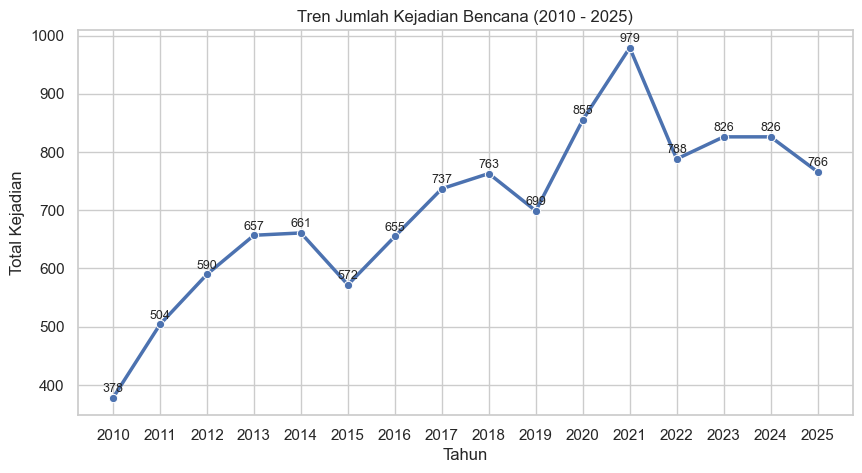

In [176]:
# Visualisasi 1: Tren Jumlah Kejadian Bencana (2010 - 2025)
# Menjawab pertanyaan "Bagaimana tren jumlah kejadian bencana di Indonesia dari tahun ke tahun?"
plt.figure(figsize=(10, 5))
trend_per_tahun = df_clean.groupby('tahun')['jumlah_kejadian'].sum().reset_index()
sns.lineplot(data=trend_per_tahun, x='tahun', y='jumlah_kejadian', marker='o', linewidth=2.5)

# Menampilkan nilai pada setiap titik
for i in range(len(trend_per_tahun)):
    x = trend_per_tahun['tahun'][i]
    y = trend_per_tahun['jumlah_kejadian'][i]
    plt.text(x, y + 10, str(y), ha='center', fontsize=9)
    
plt.xticks(trend_per_tahun['tahun'].unique())
plt.title('Tren Jumlah Kejadian Bencana (2010 - 2025)')
plt.ylabel('Total Kejadian')
plt.xlabel('Tahun')
plt.show()

* Jumlah kejadian bencana cenderung meningkat dari 2010 hingga mencapai puncak pada tahun 2021.
* Ada beberapa fluktuasi kecil, tetapi tren keseluruhannya tetap naik.
* Setelah 2021, jumlah kejadian bencana stabil di level tinggi meskipun sedikit menurun menjelang tahun 2025.
* Tahun-tahun dengan lonjakan tajam perlu diperhatikan untuk mengevaluasi faktor eksternal.


## Penjabaran Masalah 2

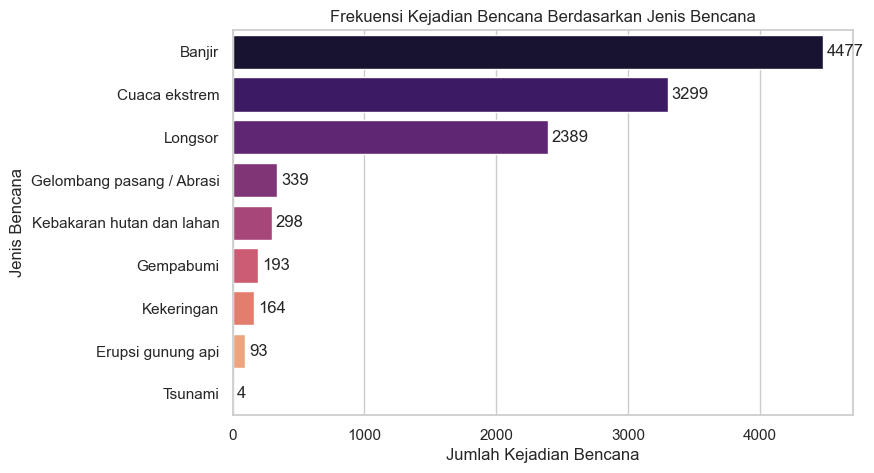

In [177]:
# Visualisasi 2: Frekuensi Kejadian Bencana Berdasarkan Jenis Bencana
# Menjawab pertanyaan "Jenis bencana apa yang paling sering terjadi dan paling dominan di Indonesia?"
plt.figure(figsize=(8, 5))
top_bencana = df_clean.groupby('jenis_bencana')['jumlah_kejadian'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(data=top_bencana, y='jenis_bencana', x='jumlah_kejadian', palette='magma')

# Tambahkan label nilai di setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.title('Frekuensi Kejadian Bencana Berdasarkan Jenis Bencana')
plt.xlabel('Jumlah Kejadian Bencana')
plt.ylabel('Jenis Bencana')
plt.show()

* Jenis bencana yang paling sering terjadi di Indonesia adalah **banjir**, diikuti oleh cuaca ekstrem dan longsor.
* Jenis bencana lain seperti gelombang pasang/Abrasi, kebakaran hutan dan lahan, gempa bumi, kekeringan, erupsi, gunung api, dan tsunami jumlahnya relatif jauh lebih rendah.

## Penjabaran Masalah 3

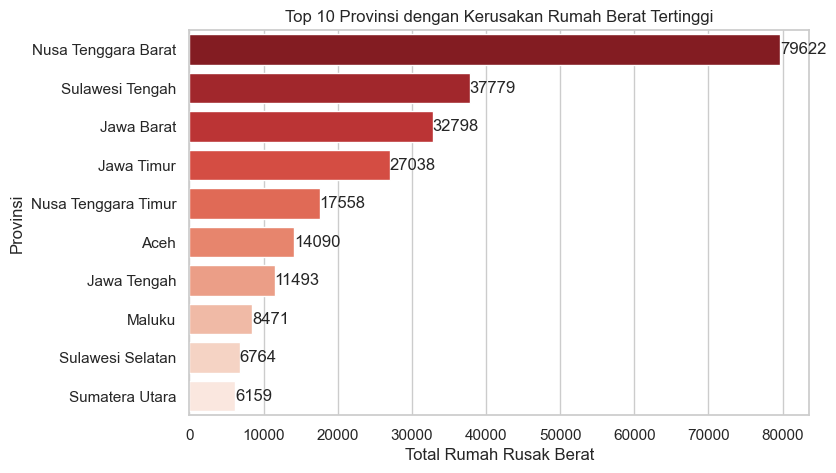

In [178]:
# Visualisasi 3: Top 10 Provinsi dengan Kerusakan Rumah Berat Tertinggi
# Menjawab pertanyaan "Provinsi mana yang termasuk zona merah dengan total kerusakan rumah berat tertinggi?"
plt.figure(figsize=(8, 5))
top_provinsi = df_clean.groupby('provinsi')['rumah_rusak_berat'].sum().sort_values(ascending=False).head(10).reset_index()
ax = sns.barplot(data=top_provinsi, x='rumah_rusak_berat', y='provinsi', palette='Reds_r')
plt.title('Top 10 Provinsi dengan Kerusakan Rumah Berat Tertinggi')
plt.xlabel('Total Rumah Rusak Berat')
plt.ylabel('Provinsi')

# Tambahkan nilai pada setiap bar
for i, value in enumerate(top_provinsi['rumah_rusak_berat']):
    plt.text(value + 10, i, str(value), va='center')  # +10 supaya label tidak menempel pada batang

plt.show()

* Zona merah utama berada di **Nusa Tenggara Barat (NTB)** dengan dampak terparah, mencatat angka kerusakan rumah berat yang sangat ekstrem (79.622 unit), jauh melampaui provinsi lainnya.
* Daftar 10 besar didominasi oleh provinsi di Pulau Jawa (Jawa Barat, Jawa Timur, Jawa Tengah) dan wilayah Nusa Tenggara (Nusa Tenggara Barat, Nusa Tenggara Timur), bisa dikatakan bahwa kedua wilayah ini adalah area paling rentan terhadap bencana yang menyebabkan kerusakan struktural masif.

## Penjabaran Masalah 4

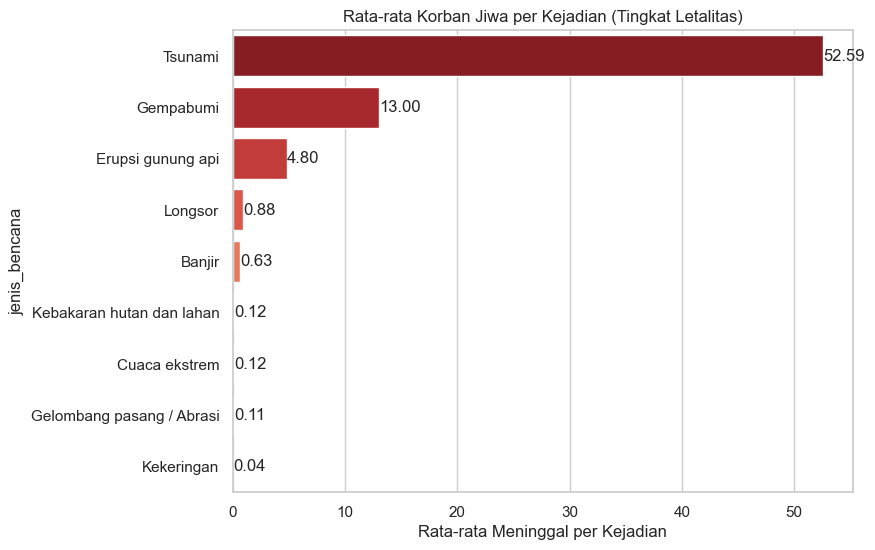

In [179]:
# Visualisasi 4: Rata-rata Korban Jiwa per Kejadian (Tingkat Letalitas)
# Menjawab pertanyaan "Bagaimana hubungan antara jenis bencana dan jumlah korban meninggal?"
plt.figure(figsize=(8, 6))
# Menggunakan rata-rata kematian per kejadian untuk melihat tingkat letalitas
letalitas = df_clean.groupby('jenis_bencana')['meninggal'].mean().sort_values(ascending=False).reset_index()
ax = sns.barplot(data=letalitas, y='jenis_bencana', x='meninggal', palette='Reds_r')

plt.title('Rata-rata Korban Jiwa per Kejadian (Tingkat Letalitas)')
plt.xlabel('Rata-rata Meninggal per Kejadian')

# Menambahkan label nilai di akhir bar
for i, v in enumerate(letalitas['meninggal']):
    ax.text(v + 0.05, i, f"{v:.2f}", va='center')

plt.show()

* **Tsunami** dan **gempa bumi** memiliki rata-rata korban meninggal paling tinggi meskipun frekuensinya tidak sesering banjir atau cuaca ekstrem.
* Banjir, cuaca ekstrem, dan longsor sangat sering terjadi namun rata-rata korban meninggalnya rendah.
* Erupsi gunung api berada di tengah, tidak terlalu sering namun tingkat korban jiwa per kejadian cukup tinggi.
* Secara keseluruhan, frekuensi tidak menentukan tingkat kematian, bencana yang jarang terjadi justru memberikan dampak fatal yang sangat besar.

## Penjabaran Masalah 5

In [180]:
# Analisis Statistik Deskriptif
# Menjawab pertanyaan "Bagaimana karakteristik distribusi jumlah pengungsi per kejadian, baik dari sisi nilai pusat maupun penyebarannya, apakah distribusinya mendekati normal? Atau menunjukkan skewness dan outlier yang cukup ekstrem?"

col_target = 'mengungsi'

# Central Tendency
mean_val = df_clean[col_target].mean()
median_val = df_clean[col_target].median()
mode_val = df_clean[col_target].mode()[0]

# Measure of Variance
std_dev = df_clean[col_target].std()

# Distribusi
skewness = df_clean[col_target].skew()
kurtosis = df_clean[col_target].kurt()

print(f"Mean                : {mean_val:.2f}")
print(f"Median              : {median_val}")
print(f"Mode                : {mode_val}")
print(f"Skewness            : {skewness:.2f}")
print(f"Kurtosis            : {kurtosis:.2f}")

Mean                : 643.72
Median              : 0.0
Mode                : 0
Skewness            : 28.69
Kurtosis            : 1225.86


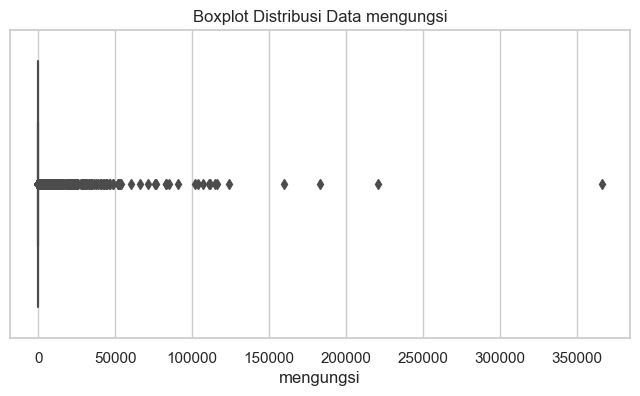

In [181]:
# Visualisasi Distribusi (Boxplot) untuk melihat Outlier
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean[col_target], color='orange')
plt.title(f'Boxplot Distribusi Data {col_target}')
plt.show()

* Distribusi **sangat tidak normal** karena median dan modus = 0, sementara mean jauh lebih tinggi (643), menunjukkan mayoritas kejadian tidak menyebabkan pengungsian.
* Nilai skewness = 28.69 menandakan distribusi sangat right-skewed (ditarik ke kanan oleh nilai ekstrem).
* Nilai kurtosis = 1225.86 menunjukkan adanya outlier ekstrem dalam jumlah besar.
* Boxplot menunjukkan banyaknya titik outlier dengan nilai pengungsi mencapai ratusan ribu, jauh dari mayoritas data.
* Karena distribusi tidak mendekati normal dan didominasi oleh outlier besar, maka lebih cocok dilakukan analisis menggunakan nilai persentil tertentu untuk perencanaan cadangan logistik agar lebih efisien namun tetap siaga.

In [182]:
# Analisis Persentil
# menggunakan persentil ke-75, 90, dan 95 sebagai acuan stok.

col_target = 'mengungsi'
p75 = df_clean[col_target].quantile(0.75)
p90 = df_clean[col_target].quantile(0.90)
p95 = df_clean[col_target].quantile(0.95)
p99 = df_clean[col_target].quantile(0.99)

print(f"Rekomendasi Stok Logistik:")
print(f"- Level Siaga 1 (Cover 75% kejadian) : Siapkan untuk {p75:.0f} pengungsi")
print(f"- Level Siaga 2 (Cover 90% kejadian) : Siapkan untuk {p90:.0f} pengungsi")
print(f"- Level Siaga 3 (Cover 95% kejadian) : Siapkan untuk {p95:.0f} pengungsi")
print(f"- Level Ekstrem (Cover 99% kejadian) : Siapkan untuk {p99:.0f} pengungsi")

Rekomendasi Stok Logistik:
- Level Siaga 1 (Cover 75% kejadian) : Siapkan untuk 30 pengungsi
- Level Siaga 2 (Cover 90% kejadian) : Siapkan untuk 400 pengungsi
- Level Siaga 3 (Cover 95% kejadian) : Siapkan untuk 1379 pengungsi
- Level Ekstrem (Cover 99% kejadian) : Siapkan untuk 12217 pengungsi


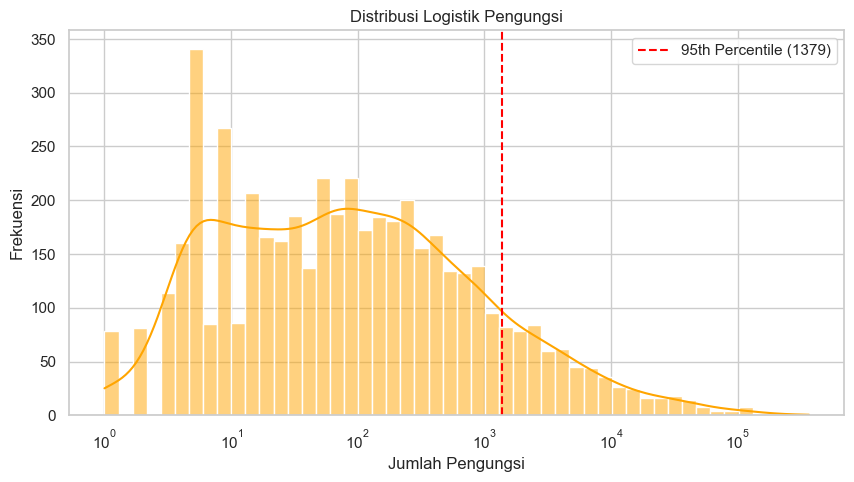

In [183]:
# Visualisasi Fokus pada Non-Zero (Log Scale)
# Agar outlier terlihat lebih jelas distribusinya dibanding boxplot biasa
plt.figure(figsize=(10, 5))
data_nonzero = df_clean[df_clean[col_target] > 0][col_target]
sns.histplot(data_nonzero, bins=50, kde=True, log_scale=True, color='orange')
plt.axvline(p95, color='red', linestyle='--', label=f'95th Percentile ({p95:.0f})')
plt.title('Distribusi Logistik Pengungsi')
plt.xlabel('Jumlah Pengungsi')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

Distribusi jumlah pengungsi per-kejadian sangat right skewed dan memiliki banyak outlier besar. Ini menunjukkan sebagian besar kejadian memiliki sedikit pengungsi tetapi beberapa bencana besar menimbulkan lonjakan ekstrem.

## Penjabaran Masalah 6

In [184]:
# Analisis Statistik Inferensial
# Menjawab pertanyaan "Apakah terdapat perbedaan signifikan secara statistik pada distribusi rumah rusak berat antara bencana tsunami dan gempa bumi?"

data_tsunami = df_clean[df_clean['jenis_bencana'] == 'Tsunami']['rumah_rusak_berat']
data_gempa = df_clean[df_clean['jenis_bencana'] == 'Gempabumi']['rumah_rusak_berat']

print(f"Jumlah Sampel Tsunami: {len(data_tsunami)}")
print(f"Jumlah Sampel Gempa: {len(data_gempa)}")

# Hitung Skewness
skew_tsunami = data_tsunami.skew()
skew_gempa = data_gempa.skew()

print(f"Skewness Tsunami : {skew_tsunami:.2f}")
print(f"Skewness Gempa    : {skew_gempa:.2f}")

# Hipotesis
# H0: Tidak ada perbedaan signifikan pada distribusi kerusakan rumah berat antara Tsunami dan Gempa.
# H1: Terdapat perbedaan signifikan pada distribusi kerusakan rumah berat antara Tsunami dan Gempa.

# Menggunakan metode Uji non-parametrik Mann-Whitney karena data right skewed

stat, p_value = stats.mannwhitneyu(data_tsunami, data_gempa, alternative='two-sided')

print(f"\nHasil Mann-Whitney U Test:")
print(f"U-Statistic: {stat}")
print(f"P-Value    : {p_value:.10f}") # untuk melihat nilai sangat kecil

alpha = 0.05
print(f"\nKesimpulan Hipotesis (Alpha {alpha}):")
if p_value < alpha:
    print("P-Value < Alpha -> TOLAK H0. (Signifikan)")
    print("Terdapat perbedaan signifikan pada distribusi kerusakan rumah berat antara Tsunami dan Gempa..")
else:
    print("P-Value > Alpha -> GAGAL TOLAK H0. (Tidak Signifikan)")
    print("Tidak ada perbedaan signifikan pada distribusi kerusakan rumah berat antara Tsunami dan Gempa.")

Jumlah Sampel Tsunami: 17
Jumlah Sampel Gempa: 441
Skewness Tsunami : 2.29
Skewness Gempa    : 12.32

Hasil Mann-Whitney U Test:
U-Statistic: 3543.0
P-Value    : 0.6880145615

Kesimpulan Hipotesis (Alpha 0.05):
P-Value > Alpha -> GAGAL TOLAK H0. (Tidak Signifikan)
Tidak ada perbedaan signifikan pada distribusi kerusakan rumah berat antara Tsunami dan Gempa.


* Distribusi kerusakan kedua bencana sama-sama right skewed, terutama gempa dengan skewness yang jauh lebih ekstrem.
* Uji Mann-Whitney digunakan karena data tidak normal dan ukuran sampel tidak seimbang, akan dilakukan resampling untuk menangani ketimpangan sampel (17 vs 441) dan menghitung confidence interval.

In [188]:
data_tsunami = df_clean[df_clean['jenis_bencana'] == 'Tsunami']['rumah_rusak_berat']
data_gempa = df_clean[df_clean['jenis_bencana'] == 'Gempabumi']['rumah_rusak_berat']

print(f"Original Sample Size -> Tsunami: {len(data_tsunami)}, Gempa: {len(data_gempa)}")

# Parameter Bootstrap
n_iterations = 10000
bootstrap_diffs = [] # List untuk menyimpan selisih rata-rata tiap iterasi

# Set seed agar hasil konsisten
np.random.seed(42) 

# Proses Resampling (Bootstrap Loop)
for _ in range(n_iterations):
    # Ambil sampel acak dari data Tsunami (dengan pengembalian/replacement)
    # Ukuran sampel tetap sama dengan aslinya untuk menjaga karakteristik asli
    sample_tsunami = np.random.choice(data_tsunami, size=len(data_tsunami), replace=True)
    
    # Ambil sampel acak dari data Gempa
    sample_gempa = np.random.choice(data_gempa, size=len(data_gempa), replace=True)
    
    # Hitung rata-rata tiap sampel
    mean_tsunami = np.mean(sample_tsunami)
    mean_gempa = np.mean(sample_gempa)
    
    # Hitung selisih rata-rata (Tsunami - Gempa) dan simpan
    diff = mean_tsunami - mean_gempa
    bootstrap_diffs.append(diff)

# Menghitung Confidence Interval (CI) 95%
# Mengambil persentil ke-2.5 (Batas Bawah) dan ke-97.5 (Batas Atas)
lower_bound = np.percentile(bootstrap_diffs, 2.5)
upper_bound = np.percentile(bootstrap_diffs, 97.5)

print(f"\nHasil Bootstrap Resampling ({n_iterations} iterasi)")
print(f"95% Confidence Interval selisih rata-rata: [{lower_bound:.2f}, {upper_bound:.2f}]")

Original Sample Size -> Tsunami: 17, Gempa: 441

Hasil Bootstrap Resampling (10000 iterasi)
95% Confidence Interval selisih rata-rata: [-539.04, -18.94]


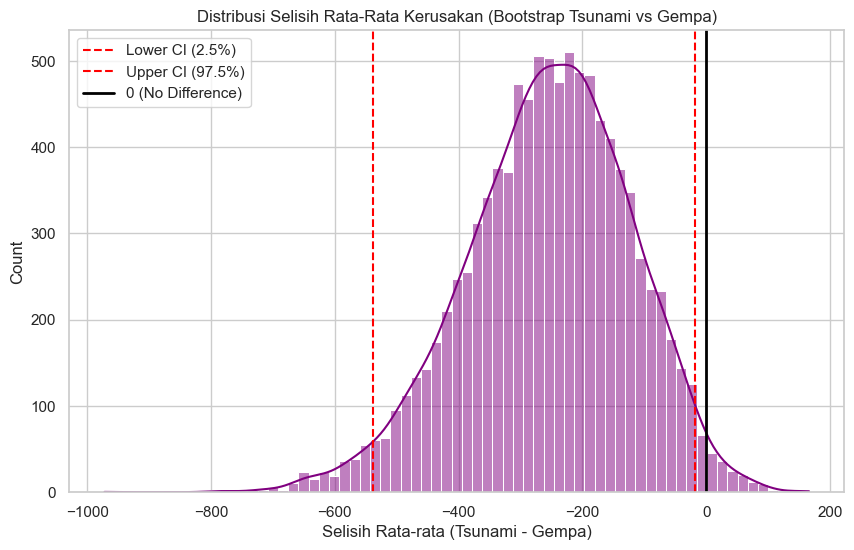

In [186]:
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_diffs, kde=True, color='purple')
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower CI (2.5%)')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper CI (97.5%)')
plt.axvline(x=0, color='black', linewidth=2, label='0 (No Difference)')
plt.title('Distribusi Selisih Rata-Rata Kerusakan (Bootstrap Tsunami vs Gempa)')
plt.xlabel('Selisih Rata-rata (Tsunami - Gempa)')
plt.legend()
plt.show()

In [187]:
# Jika angka 0 berada di dalam rentang Confidence Interval, maka H0 Gagal Ditolak (Tidak Signifikan).
# Jika angka 0 TIDAK ada di dalam rentang (range positif semua atau negatif semua), maka H0 Ditolak (Signifikan).

if lower_bound <= 0 <= upper_bound:
    print("Kesimpulan: GAGAL TOLAK H0 (Tidak Signifikan).")
    print(f"Karena nilai 0 berada di dalam rentang Confidence Interval [{lower_bound:.2f}, {upper_bound:.2f}].")
    print("Artinya: Meskipun sampel Tsunami sedikit, analisis resampling menunjukkan TIDAK ADA perbedaan signifikan secara statistik pada dampak kerusakan rumah berat rata-rata antara Tsunami dan Gempa Bumi.")
else:
    print("Kesimpulan: TOLAK H0 (Signifikan).")
    print(f"Karena nilai 0 berada DI LUAR rentang Confidence Interval [{lower_bound:.2f}, {upper_bound:.2f}].")
    print("Artinya: Terdapat perbedaan yang signifikan secara statistik pada dampak kerusakan rumah berat antara Tsunami dan Gempa Bumi.")

Kesimpulan: TOLAK H0 (Signifikan).
Karena nilai 0 berada DI LUAR rentang Confidence Interval [-539.04, -18.94].
Artinya: Terdapat perbedaan yang signifikan secara statistik pada dampak kerusakan rumah berat antara Tsunami dan Gempa Bumi.


* Seluruh confidence interval berada di bawah 0, berarti **rata-rata kerusakan tsunami lebih rendah daripada gempa**.
* Distribusi selisih rata-rata stabil di area negatif menunjukkan bahwa **gempa menyebabkan kerusakan rumah berat lebih besar**.

# Pengambilan Kesimpulan

Berdasarkan analisis terhadap data historis bencana di Indonesia, terdapat beberapa pola penting yang dapat menjadi dasar penyusunan strategi untuk mencapai target penurunan korban jiwa dan kerusakan infrastruktur sebesar 15% dalam satu tahun ke depan.

1. **Prioritas Mitigasi Berdasarkan Wilayah dan Jenis Bencana**
* Nusa Tenggara Barat (NTB) serta sebagian wilayah di Pulau Jawa (Jawa Barat, Jawa Timur, dan Jawa Tengah) muncul sebagai zona dengan tingkat kerusakan struktural paling tinggi. Daerah-daerah tersebut membutuhkan perhatian khusus dalam penguatan infrastruktur.
* Walaupun banjir paling sering terjadi, data menunjukkan bahwa gempa bumi dan tsunami memiliki tingkat kematian dan kerusakan rumah berat yang jauh lebih tinggi.
* **Rekomendasi:** Anggaran mitigasi sebaiknya tidak dibagi rata hanya berdasarkan frekuensi bencana. Investasi pada infrastruktur tahan gempa perlu diprioritaskan. Anggaran logistik dan kesiapsiagaan rutin lebih relevan untuk menghadapi banjir.
  
2. **Strategi Manajemen Logistik yang Lebih Efektif**
* Distribusi jumlah pengungis per-kejadian sangat tidak merata. Sebagian besar bencana berdampak kecil, tetapi ada beberapa kejadian ekstrem yang melibatkan jumlah pengungsi sangat banyak. Karena itu, penggunaan nilai rata-rata untuk menentukan stok logistik dapat menyesatkan.
* Analisis persentil menunjukkan bahwa kesiapan logistik paling optimal berada di **persentil ke-95**, yaitu sekitar **1379 orang**. Angka ini mampu mencakup 95% kejadian tanpa menghasilkan stok berlebih.
* **Rekomendasi:** Pemerintah daerah sebaiknya menetapkan buffer stock logistik pada kisaran 1400 pengungsi. Jika suatu kejadian melebihi kapasitas ini, maka mekanisme harus langsung dialihkan pada bantuan darurat tingkat pusat.
  
3. **Penguatan Regulasi Bangunan Tahan Gempa**
* Hasil analisis statistik menunjukkan bahwa gempa bumi menyebabkan kerusakan rumah berat yang secara signifikan lebih besar dibandingkan jenis bencana lainnya. Hal tersebut menegaskan bahwa ketahanan bangunan adalah faktor krusial yang harus diperbaiki.
* **Rekomendasi:** Pemerintahan daerah di zona rawan gempa perlu memperketat standar dan pengawasan IMB serta melakukan audit berkala pada bangunan publik untuk memastikan kepatuhan terhadap standar konstruksi tahan gempa.

# Save Cleaned Data to CSV
untuk diolah di Tableau

In [189]:
df_clean.to_csv('clean_DIBI_BNPB.csv', index=False) 